In [51]:
import os
from random import randint
import numpy as np
from scipy.linalg import subspace_angles
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [52]:
WS_LOC = '../../data/subspaces/goi5k/'

In [53]:
def get_subspace(folder: str = WS_LOC, index = None) -> np.ndarray:
    npy_subspaces = os.listdir(WS_LOC)
    if index is None:
        index = randint(0, len(npy_subspaces))
    S = np.load(os.path.join(WS_LOC, npy_subspaces[index]))
    return S

In [54]:
def subspaces_similarity(S1, S2):
    canon_angles = subspace_angles(S1, S2)
    return np.average(np.square(np.cos(canon_angles)))

In [55]:
sim_scores = []
for i in range(200):
    sub_one = get_subspace()
    sub_two = get_subspace()
    sim = subspaces_similarity(S1=sub_one, S2=sub_two)
    if sim < 1.0 :
        sim_scores.append(sim)

Text(0.5, 0, 'Cases')

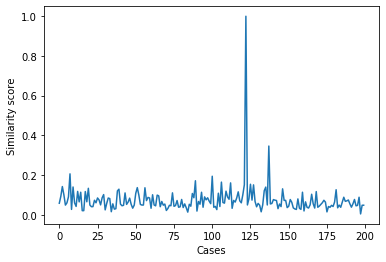

In [21]:
plt.plot(sim_scores)
plt.ylabel('Similarity score')
plt.xlabel('Cases')
# plt.show()

In [22]:
sub_one[0]

array([-1.7611408 , -0.63444746, -0.41016173,  0.17665766,  0.4914539 ],
      dtype=float32)

In [61]:
sub_ = PCA(n_components=2).fit_transform(sub_one)

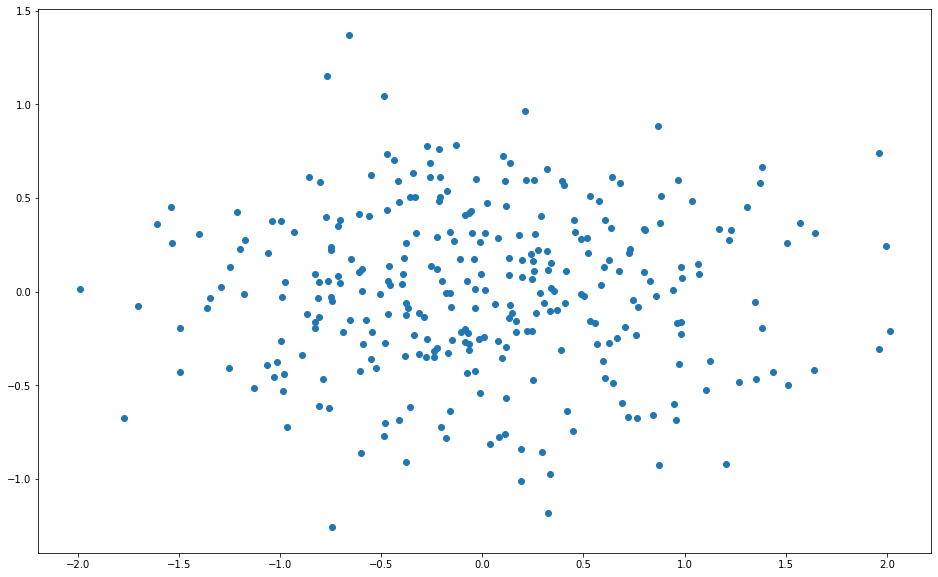

In [67]:
plt.figure(figsize=(16,10))
plt.scatter(x=sub_[:, 0], y=sub_[:, 1])

In [32]:
sub_ = PCA(n_components=3).fit_transform(sub_one)

In [45]:
sub_[1]

array([-1.334795  ,  0.4326149 ,  0.25514457], dtype=float32)

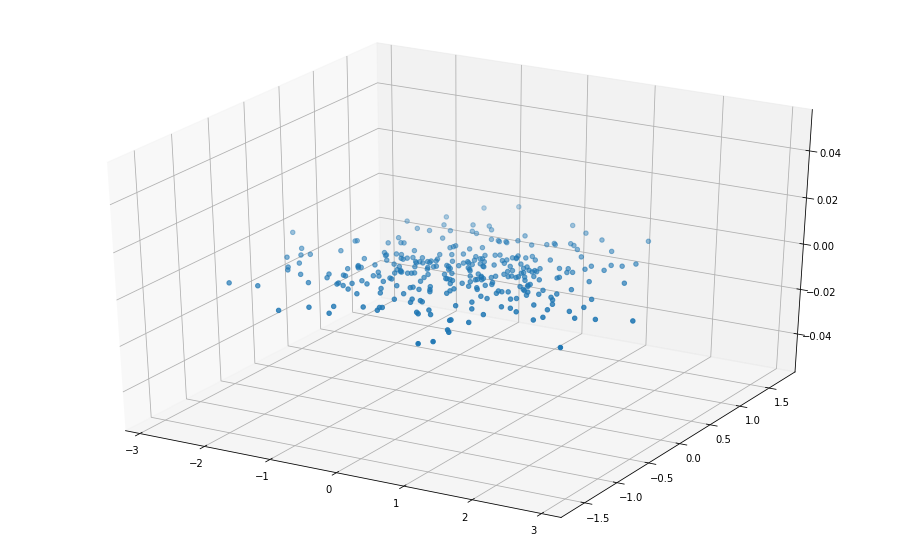

In [49]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=sub_[:, 0], ys=sub_[:, 1])